**LOAN APPROVAL PREDICTION**

IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report




READING THE DATASET

In [2]:
df=pd.read_csv("loan_approval_prediction_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [3]:
df.shape

(4269, 13)

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

**preprocessing**

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        92000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [10]:
df.iloc[:,[2,3,-1]]


education  self_employed  loan_status
0          Graduate             No     Approved
1      Not Graduate            Yes     Rejected
2          Graduate             No     Rejected
3          Graduate             No     Rejected
4      Not Graduate            Yes     Rejected
...             ...            ...          ...
4264       Graduate            Yes     Rejected
4265   Not Graduate            Yes     Approved
4266   Not Graduate             No     Rejected
4267   Not Graduate             No     Approved
4268       Graduate             No     Approved

[4269 rows x 3 columns]

**LABEL ENCODING**

In [12]:

le=LabelEncoder()
df[" loan_status"]=le.fit_transform(df[" loan_status"])
df[" education"]=le.fit_transform(df[" education"])
df[" self_employed"]=le.fit_transform(df[" self_employed"])
df.iloc[:,[2,3,-1]]

education   self_employed   loan_status
0              0               0             0
1              1               1             1
2              0               0             1
3              0               0             1
4              1               1             1
...          ...             ...           ...
4264           0               1             1
4265           1               1             0
4266           1               0             1
4267           1               0             0
4268           0               0             0

[4269 rows x 3 columns]

In [13]:
df.iloc[:,[2,3,-1]]


education   self_employed   loan_status
0              0               0             0
1              1               1             1
2              0               0             1
3              0               0             1
4              1               1             1
...          ...             ...           ...
4264           0               1             1
4265           1               1             0
4266           1               0             1
4267           1               0             0
4268           0               0             0

[4269 rows x 3 columns]

In [14]:
df

loan_id   no_of_dependents   education   self_employed   income_annum  \
0           1                  2           0               0        9600000   
1           2                  0           1               1        4100000   
2           3                  3           0               0        9100000   
3           4                  3           0               0        8200000   
4           5                  5           1               1        9800000   
...       ...                ...         ...             ...            ...   
4264     4265                  5           0               1        1000000   
4265     4266                  0           1               1        3300000   
4266     4267                  2           1               0        6500000   
4267     4268                  1           1               0        4100000   
4268     4269                  1           0               0        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

       loan_status  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
4264             1  
4265             0  
4266             1  
4267             0  
4268             0  

[4269 rows x 13 columns]

**Scaling the high value columns for more accuracy**

In [15]:

scaler = MinMaxScaler()
columns_to_scale = [" income_annum", " loan_amount", " residential_assets_value", 
                    " commercial_assets_value", " luxury_assets_value", 
                    " bank_asset_value"," loan_term"," cibil_score"]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head(5)

loan_id   no_of_dependents   education   self_employed   income_annum  \
0        1                  2           0               0       0.969072   
1        2                  0           1               1       0.402062   
2        3                  3           0               0       0.917526   
3        4                  3           0               0       0.824742   
4        5                  5           1               1       0.989691   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      0.755102    0.555556      0.796667                   0.085616   
1      0.303571    0.333333      0.195000                   0.095890   
2      0.750000    1.000000      0.343333                   0.246575   
3      0.775510    0.333333      0.278333                   0.626712   
4      0.609694    1.000000      0.136667                   0.428082   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  0.907216              0.575835           0.544218   
1                  0.113402              0.218509           0.224490   
2                  0.231959              0.848329           0.870748   
3                  0.170103              0.591260           0.537415   
4                  0.422680              0.748072           0.340136   

    loan_status  
0             0  
1             1  
2             1  
3             1  
4             1

In [19]:
df.columns = df.columns.str.strip()


**VISUALIZATION**

 Distribution of Loan Status

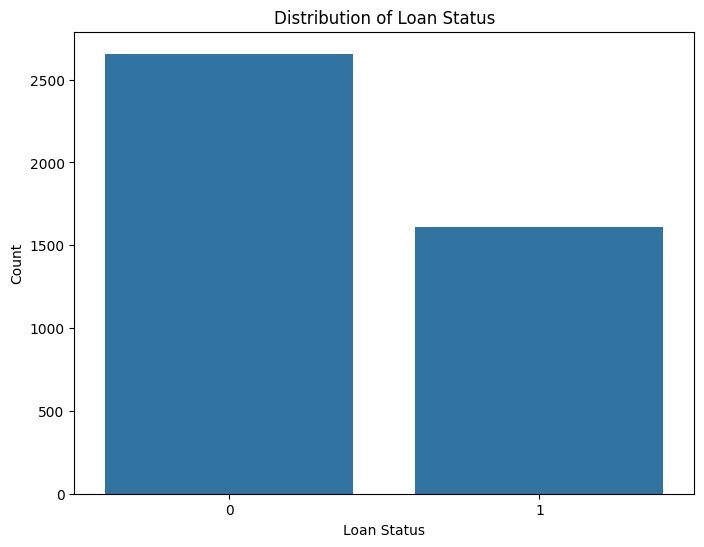

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


Distribution of Numerical Features

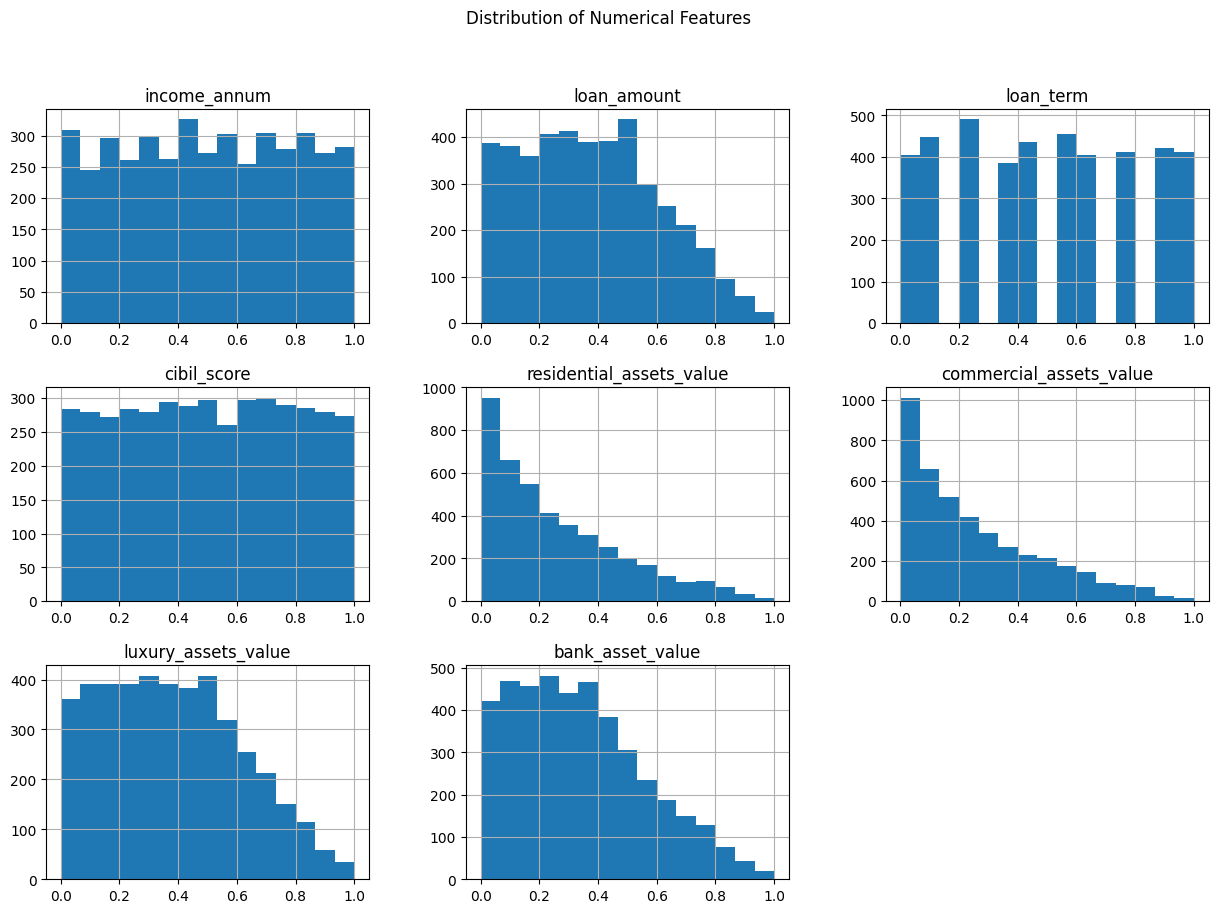

In [21]:
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 
                      'luxury_assets_value', 'bank_asset_value']

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()


**Count Plot of Categorical Features**

No of Dependents

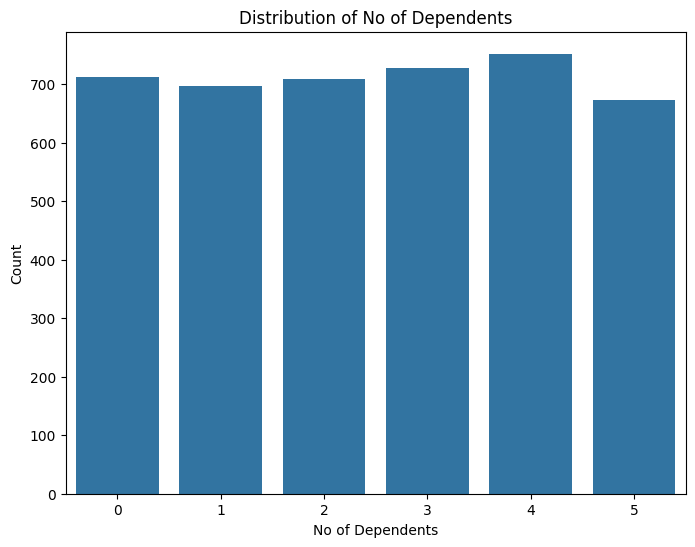

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='no_of_dependents')
plt.title('Distribution of No of Dependents')
plt.xlabel('No of Dependents')
plt.ylabel('Count')
plt.show()


Education

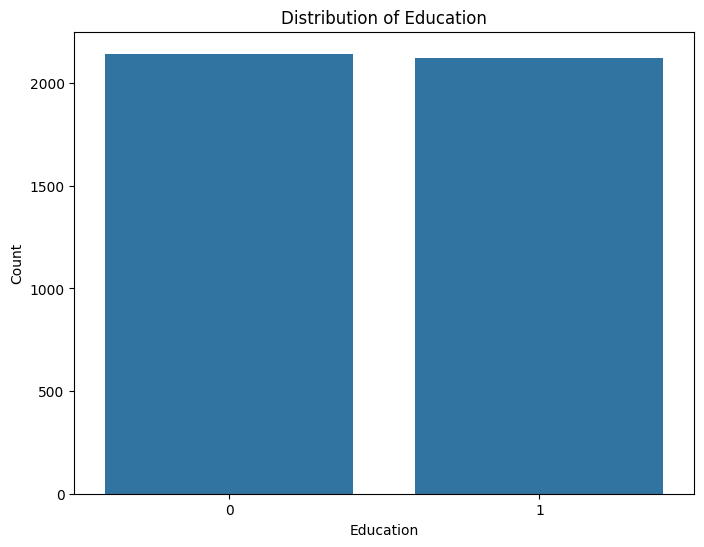

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


Self Employed

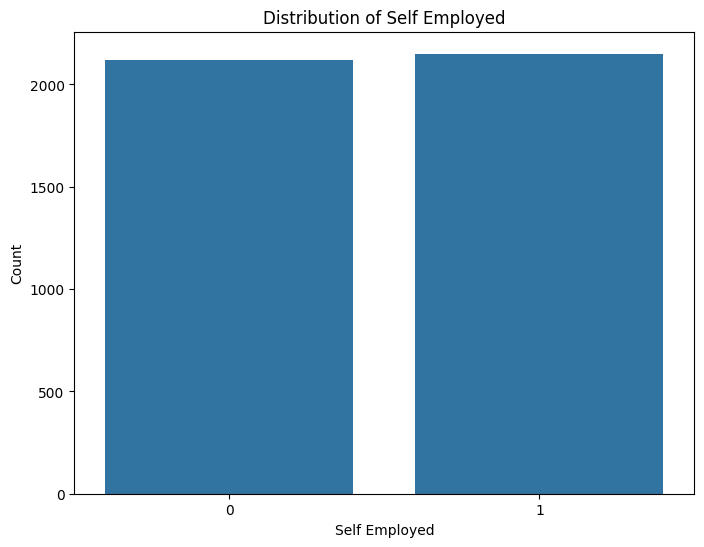

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='self_employed')
plt.title('Distribution of Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()


PAIR PLOT OF NUMERICAL FEATURES

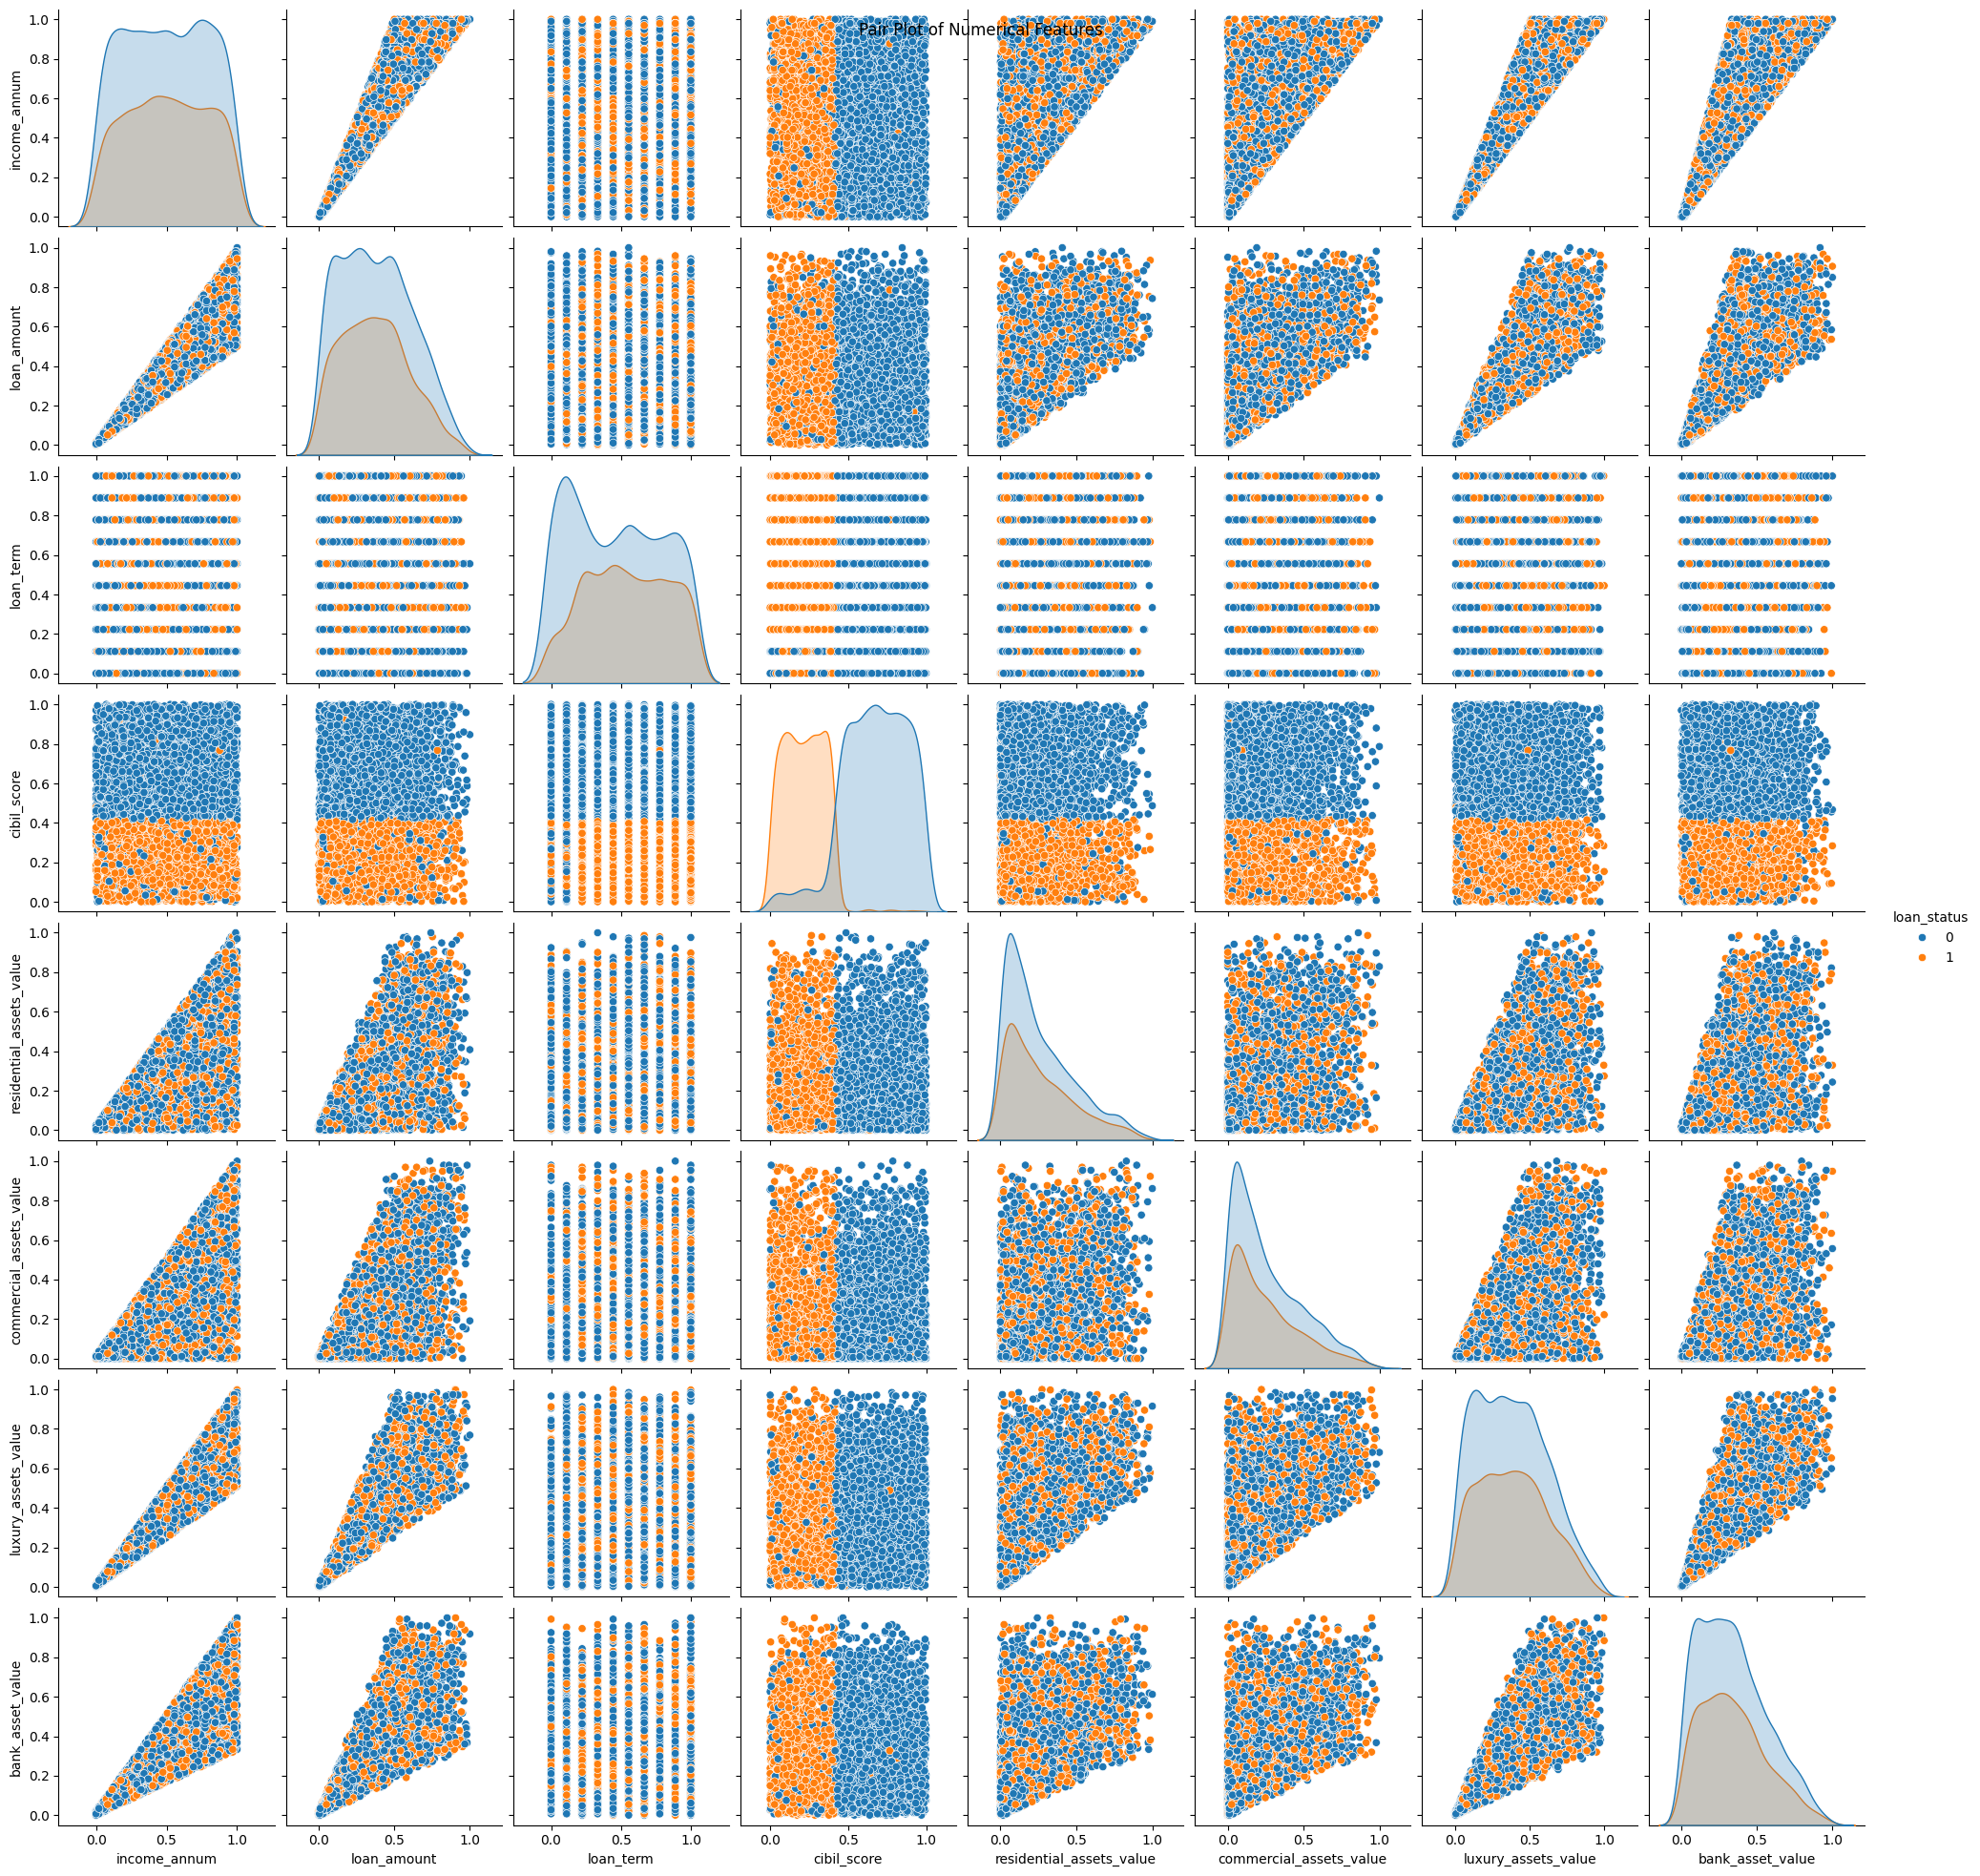

In [25]:
sns.pairplot(df, hue='loan_status', vars=numerical_features)
plt.suptitle('Pair Plot of Numerical Features')
plt.show()


Correlation Heatmap

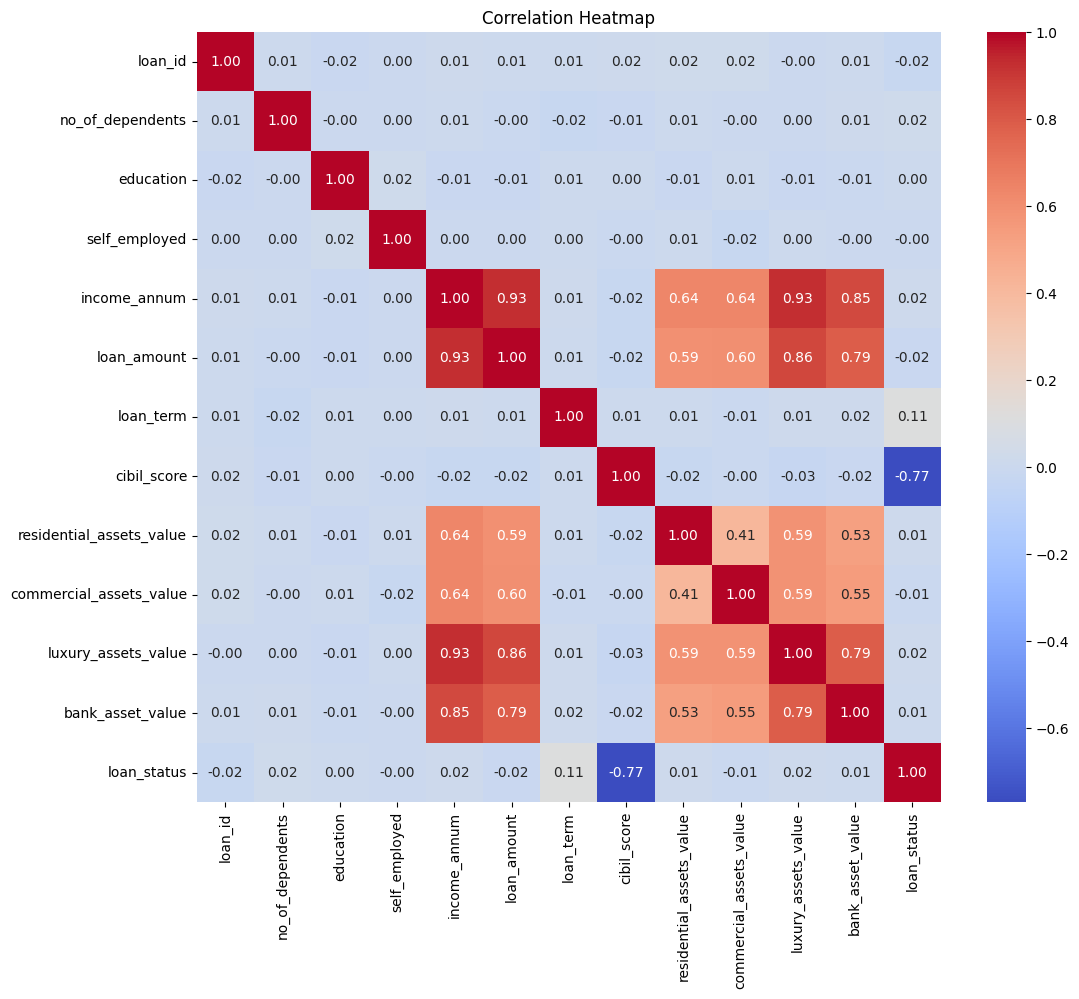

In [26]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Income vs. Loan Amount

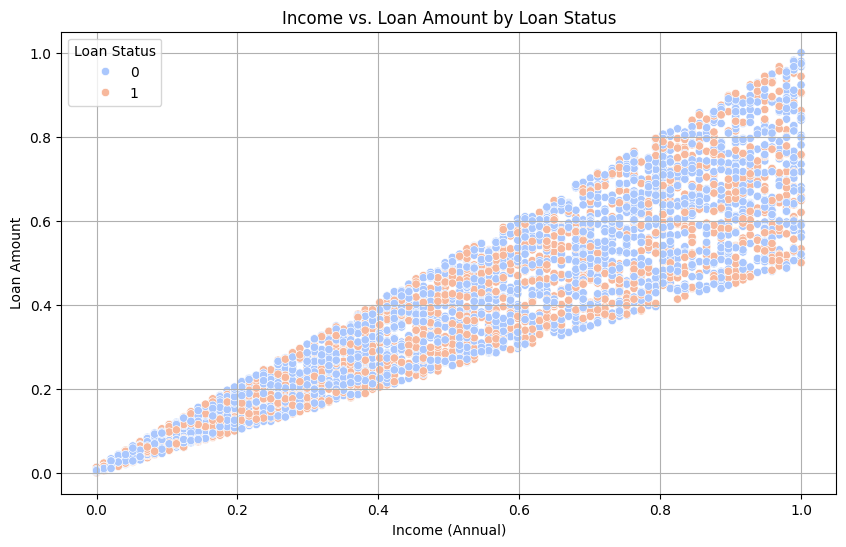

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Income vs. Loan Amount, Colored by Loan Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status', palette='coolwarm')
plt.title('Income vs. Loan Amount by Loan Status')
plt.xlabel('Income (Annual)')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper left')
plt.grid(True)
plt.show()


SPLITTING INTO TRAINING AND TESTING

In [29]:
input=df.drop(columns={"loan_id","loan_status"},axis=1)
target=df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(input,target, test_size=0.3, random_state=42)

In [30]:

X_train, X_test, y_train, y_test = train_test_split(input,target, test_size=0.3, random_state=42)

LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [34]:
model1.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [35]:
y_test

1703    1
1173    0
308     1
1322    0
3271    0
       ..
1842    1
3415    0
3291    0
2016    1
679     0
Name: loan_status, Length: 1281, dtype: int32

In [36]:
s1=model1.score(X_test,y_test)
s1

0.9110070257611241

DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
model2.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [39]:
y_test

1703    1
1173    0
308     1
1322    0
3271    0
       ..
1842    1
3415    0
3291    0
2016    1
679     0
Name: loan_status, Length: 1281, dtype: int32

In [40]:
s2=model2.score(X_test,y_test)
s2

0.975800156128025

RANDOM FOREST CLASSIFIER

In [41]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=60)
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60)

In [42]:
model3.predict(X_test)


array([1, 0, 1, ..., 0, 1, 0])

In [44]:
y_test

1703    1
1173    0
308     1
1322    0
3271    0
       ..
1842    1
3415    0
3291    0
2016    1
679     0
Name: loan_status, Length: 1281, dtype: int32

In [45]:
s3=model3.score(X_test,y_test)
s3

0.970335675253708

SUUPORT VECTOR MACHINE

In [46]:
from sklearn.svm import SVC
model4=SVC(C=2)
model4.fit(X_train,y_train)

SVC(C=2)

In [47]:
model4.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [48]:
y_test

1703    1
1173    0
308     1
1322    0
3271    0
       ..
1842    1
3415    0
3291    0
2016    1
679     0
Name: loan_status, Length: 1281, dtype: int32

In [49]:
s4=model4.score(X_test,y_test)
s4

0.9180327868852459

EVALUATING WHICH MODEL IS BETTER

(0.8, 1.0245901639344261)

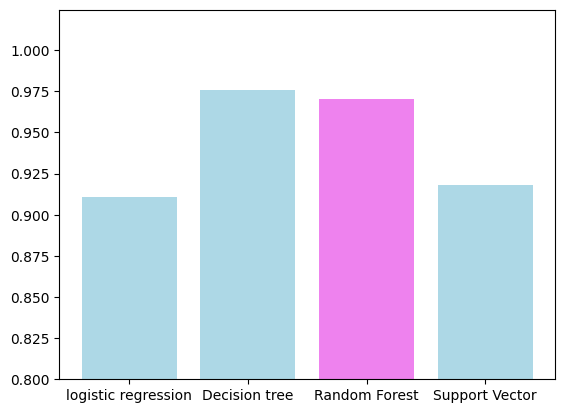

In [51]:
x=["logistic regression","Decision tree","Random Forest","Support Vector"]
y=[s1,s2,s3,s4]
plt.bar(x,y,color=["lightblue","lightblue","violet","lightblue"])

plt.ylim(0.8)



From this it is clear that Decision Tree algorithm accuracy is higher and hence it is better

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model2.predict(X_test))
cm


array([[798,  12],
       [ 19, 452]], dtype=int64)

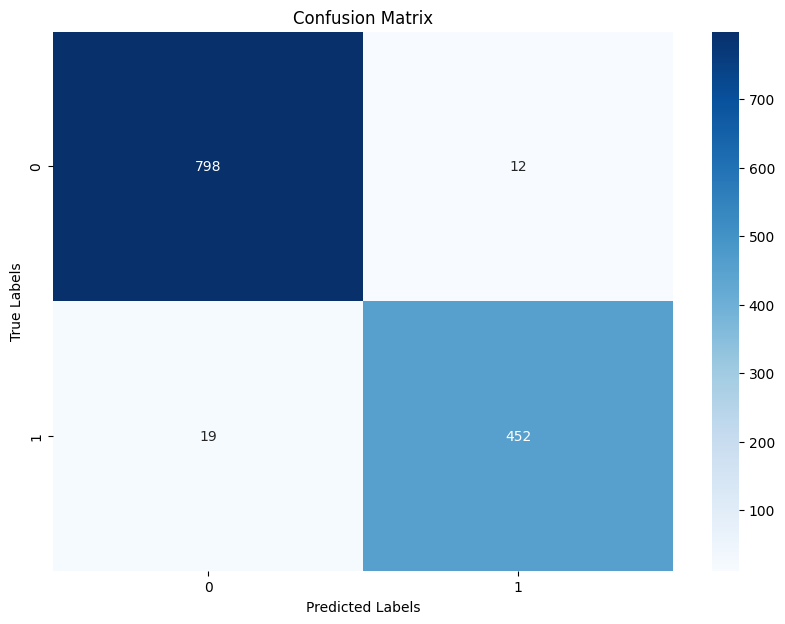

In [53]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import classification_report
classification_report(y_test,model2.predict(X_test)).split("\n")


['              precision    recall  f1-score   support',
 '',
 '           0       0.98      0.99      0.98       810',
 '           1       0.97      0.96      0.97       471',
 '',
 '    accuracy                           0.98      1281',
 '   macro avg       0.98      0.97      0.97      1281',
 'weighted avg       0.98      0.98      0.98      1281',
 '']